In [1]:
import sys
import matplotlib
%matplotlib inline
import argparse
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())

'''before we import theano anywhere else we want to make sure we specify 
a unique directory for compiling, so we dont get into a locking issue
if we run multiple hur_mains at once on a global file system'''
from notebooks.run_dir import create_run_dir
run_dir = create_run_dir()
from notebooks.helper_fxns import dump_hyperparams
from notebooks.data_loader import load_classification_dataset, load_detection_dataset
from notebooks.train_val import train
from notebooks.print_n_plot import plot_ims_with_boxes
from notebooks.build_network import build_network

importing Jupyter notebook from notebooks/run_dir.ipynb
importing Jupyter notebook from notebooks/helper_fxns.ipynb
importing Jupyter notebook from notebooks/data_loader.ipynb
importing Jupyter notebook from notebooks/train_val.ipynb
importing Jupyter notebook from notebooks/print_n_plot.ipynb
importing Jupyter notebook from notebooks/build_network.ipynb


getting data...
40
running on non pretrained classif network!
Building model and compiling functions...
Building model and compiling functions...
Starting training...
Epoch 1 of 1 took 3.787s
	training los:		6.8656
	training acc:		0.0000 %
  validation loss:		8.574694
  validation accuracy:		0.00 %


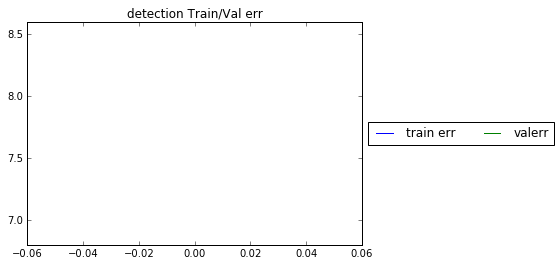

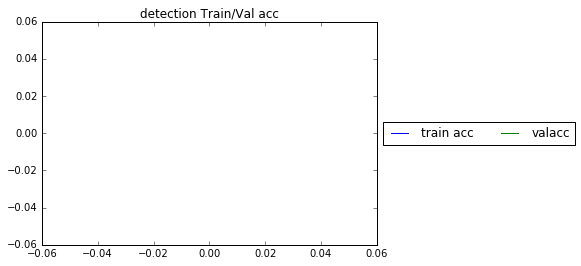

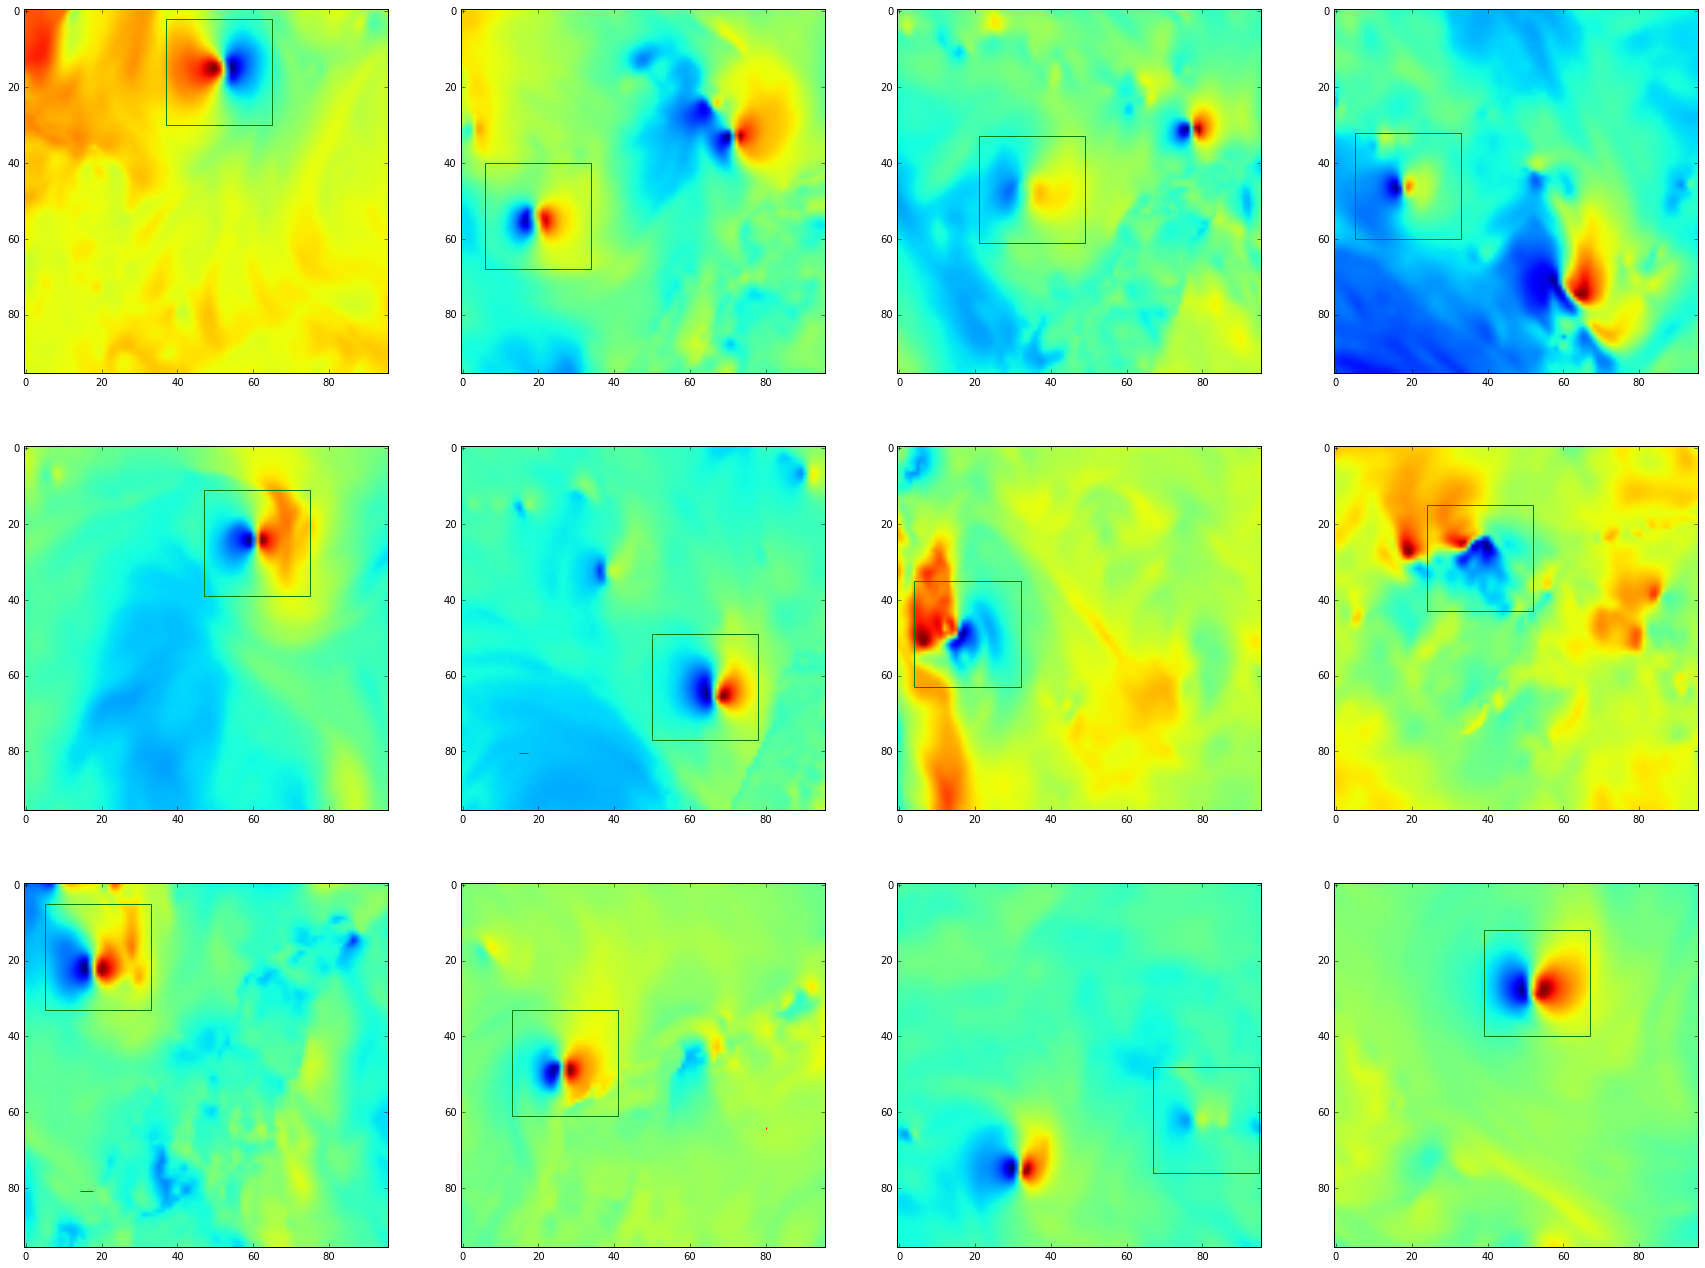

In [2]:
epochs = 1
learning_rate = 0.0001
num_ims = 40
num_filters = 128
num_fc_units = 128


# parser = argparse.ArgumentParser()
# parser.add_argument('-e', '--epochs', type=int, default=10,
#     help='number of epochs for training')

# parser.add_argument('-l', '--learn_rate', default=0.0001, type=float,
#     help='the learning rate for the network')

# parser.add_argument('-n', '--num_ims', default=40, type=int,
#     help='number of total images')

# parser.add_argument('-f', '--num_filters', default=512, type=int,
#     help='number of filters in each conv layer')

# parser.add_argument('-c', '--num_fc_units', default=512, type=int,
#     help='number of fully connected units')

# parser.add_argument('-d', '--coord_loss', default=5, type=int,
#     help='penalty for guessing coordinates or height wrong')
# args = parser.parse_args()
# epochs = args.epochs
# learning_rate = args.learn_rate
# num_ims = args.num_ims
# num_filters = args.num_filters
# lc = args.lc


run_dir = create_run_dir()

dataset = load_detection_dataset(num_ims=num_ims)

'''size of ground truth grid'''
grid_size = dataset[1].shape[1]

'''set params'''
network_kwargs = {'learning_rate': learning_rate, 'dropout_p': 0, 'weight_decay': 0, 
                  'num_filters': num_filters, 'num_fc_units': num_fc_units}
detec_network_kwargs = {'grid_size': grid_size, 'nclass': 1, 'n_boxes':1, 'lc': lc, 'ln': ln}


'''get network and train_fns'''
train_fn, val_fn, box_fn, network, hyperparams = build_network(mode='detection', 
                                                               network_kwargs=network_kwargs, 
                                                               detec_specific_kwargs=detec_network_kwargs)

'''save hyperparams'''
dump_hyperparams(hyperparams, path=run_dir)

'''train'''
train(dataset, network=network, fns=(train_fn, val_fn, box_fn), num_epochs=epochs, save_path=run_dir)